## Code Description
#### This Python script performs a basic exploratory data analysis (EDA) on a coffee shop sales dataset (coffee.csv) using Pandas. The dataset contains transaction-level details such as the time of purchase, coffee type, payment method, and sales amount.

### 1 -  Import Libraries 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2 - Data Loading
- Loads the dataset coffee.csv into a Pandas DataFrame called df.

In [39]:
df = pd.read_csv("coffee.csv")

### 3 - Descriptive & Summary Insights
- df.head() displays the first few rows of the dataset to get an overview of the data structure and sample values.
- df.info() provides a summary of the dataset, including column names, data types, and non-null counts — useful for understanding data completeness and structure.
- df.describe() Identify the range and distribution of money spent.

In [40]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,01/03/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,01/03/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,01/03/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,01/03/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,01/03/2024,48:14.6


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [42]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


- See which coffee types or payment methods are most common.

In [43]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

In [44]:
df['cash_type'].value_counts()

cash_type
card    3547
Name: count, dtype: int64

### 4 - Revenue Analysis by Coffee Type
- Groups the data by coffee_name and calculates the total sales revenue (money) for each coffee type.
- The results are sorted in descending order to identify the best-selling coffee types by total revenue.

In [45]:
df.groupby('coffee_name')['money'].sum().sort_values(ascending = False)

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

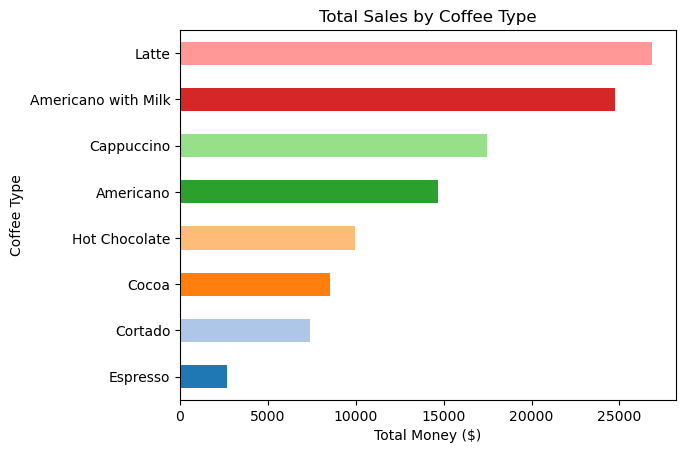

In [46]:
grouped = df.groupby('coffee_name')['money'].sum().sort_values()
colors = plt.cm.tab20.colors[:len(grouped)]
grouped.plot(kind='barh', color =colors)
plt.title('Total Sales by Coffee Type')
plt.xlabel('Total Money ($)')
plt.ylabel('Coffee Type')
plt.show()

### 5 - Revenue Analysis by Time of Day
- Aggregates total sales revenue by Time_of_Day (e.g., Morning, Afternoon, Evening).
- Helps determine which part of the day generates the most sales.

In [47]:
df.groupby('Time_of_Day')['money'].sum().sort_values(ascending = False)

Time_of_Day
Night        38186.34
Afternoon    38130.04
Morning      35929.20
Name: money, dtype: float64

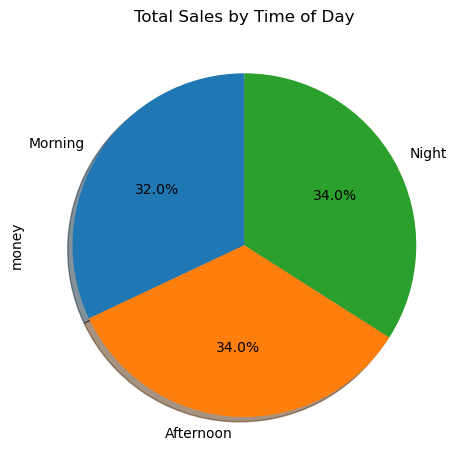

In [48]:
time_of_day = df.groupby('Time_of_Day')['money'].sum().sort_values()
colors = plt.cm.tab20(np.linspace(0, 1, len(time_of_day)))
time_of_day.plot(kind='pie', color=colors, autopct='%1.1f%%', startangle=90, shadow=True  )
plt.title('Total Sales by Time of Day')
plt.tight_layout()
plt.show()

### 6 - Revenue Analysis by Month
- Groups the data by Month_name and computes total revenue for each month.
- Useful for identifying seasonal trends or the most profitable months.

In [50]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_name'] = pd.Categorical(df['Month_name'], categories=month_order, ordered=True)
monthly_sum = df.groupby('Month_name', observed=False)['money'].sum()
monthly_sum = monthly_sum.sort_index()
print(monthly_sum)

Month_name
Jan     6398.86
Feb    13215.48
Mar    15891.64
Apr     5719.56
May     8164.42
Jun     7617.76
Jul     6915.94
Aug     7613.84
Sep     9988.64
Oct    13891.16
Nov     8590.54
Dec     8237.74
Name: money, dtype: float64


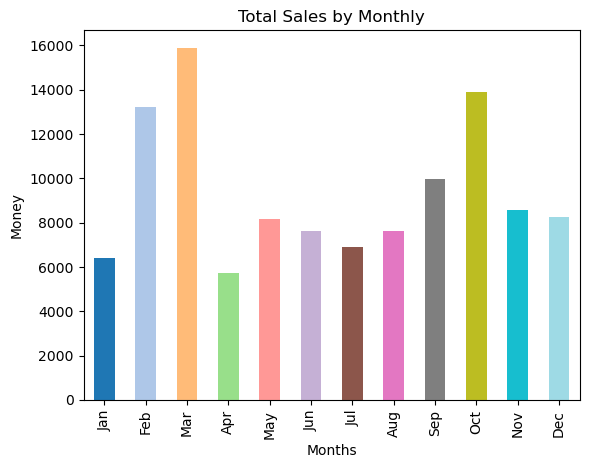

In [58]:
monthly_revenue = monthly_sum = monthly_sum.sort_index()
colors = plt.cm.tab20(np.linspace(0, 1, len(monthly_revenue)))
monthly_revenue.plot(kind='bar', color = colors)
plt.title('Total Sales by Monthly')
plt.xlabel('Months')
plt.ylabel('Money')
plt.show()

### 7 - Summary
- In short, the script:
  - Loads and explores a coffee sales dataset.
  - Analyzes total revenue by coffee type, time of day, and month to uncover sales trends and patterns.
  - Provides insights into customer preferences and optimal sales periods.